In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import List, Tuple
from scipy import stats
import seaborn as sns

sns.set_theme(style="darkgrid")

# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).


In [46]:
DATA_PATH = "../datasets/teen_phone_addiction_dataset.csv"

try:
    df = pd.read_csv(DATA_PATH)
    if df.empty:
        raise ValueError("Файл пустой")
except Exception as e:
    raise RuntimeError(f"Ошибка при загрузке данных: {e}")

df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [58]:
N = 20 # вроде

col_name = dict(enumerate(df.columns))[N % 7]
col = df[col_name]
col 

0       4.0
1       5.5
2       5.8
3       3.1
4       2.5
       ... 
2995    3.9
2996    3.6
2997    3.2
2998    6.7
2999    3.5
Name: Daily_Usage_Hours, Length: 3000, dtype: float64

## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения


In [59]:
mean_val = col.mean()
var_val = col.var(ddof=1)
mode_val = col.mode().tolist()
median_val = col.median()
q25, q50, q75 = col.quantile([0.25, 0.5, 0.75])
skewness_val = col.skew()
kurtosis_excess_val = col.kurtosis()  # Fisher=True
iqr_val = q75 - q25

print(f"Среднее: {mean_val:.3f}")
print(f"Дисперсия: {var_val:.3f}")
print(f"Мода: {mode_val}")
print(f"Медиана: {median_val}")
print(f"Квантили 0.25,0.5,0.75: {q25},{q50},{q75}")
print(f"Ассиметрия: {skewness_val:.3f}")
print(f"Эксцесс: {kurtosis_excess_val:.3f}")
print(f"Интерквартильный размах: {iqr_val:.3f}")

Среднее: 5.021
Дисперсия: 3.828
Мода: [4.4]
Медиана: 5.0
Квантили 0.25,0.5,0.75: 3.7,5.0,6.4
Ассиметрия: 0.016
Эксцесс: -0.121
Интерквартильный размах: 2.700


In [96]:
lower_bound = q25 - 1.5 * iqr_val
upper_bound = q75 + 1.5 * iqr_val

outliers_lower = col[col < lower_bound]
outliers_upper = col[col > upper_bound]

print(f"Выбросы слева: {outliers_lower.values}")
print(f"Выбросы справа: {outliers_upper.values}")

Выбросы слева: [-0.52167965 -0.98168456 -1.28835451 ... -0.72612628 -0.93057291
 -0.77723793]
Выбросы справа: []


- Среднее и медиана приблизительно равны; маленькая ассиметрия; левая половина по квантилям 1.3, правая 1.4 -> данные симметричны
- Мода < среднее, медиана, эксцесс отрицателен -> небольшая левохвотизна
- Есть больше выбросов слева от q25 - 1.5*IQR, подтверждается немного тяжелый левый хвостик

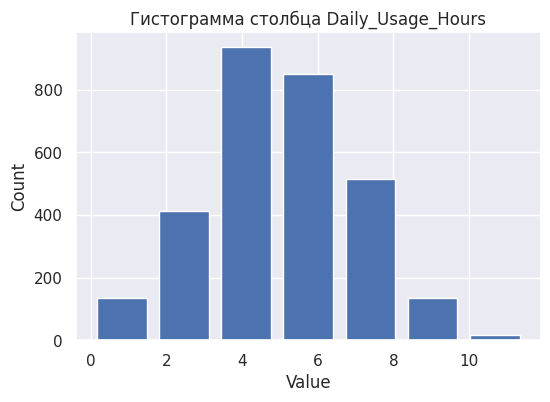

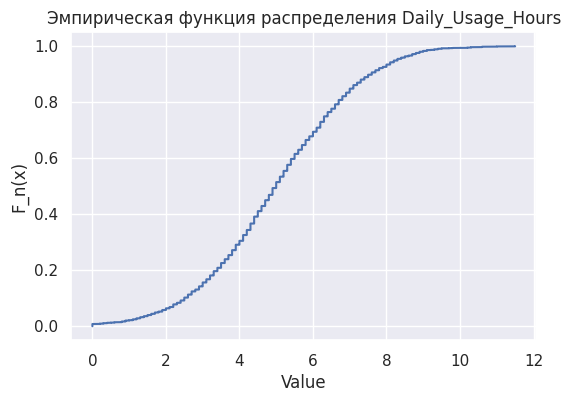

In [60]:
# Гистограмма
plt.figure(figsize=(6,4))
plt.hist(col, bins=7, rwidth=0.8)
plt.title(f"Гистограмма столбца {col_name}")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()

# ECDF
x_sorted = np.sort(col)
y_ecdf = np.arange(1, len(x_sorted)+1)/len(x_sorted)
plt.figure(figsize=(6,4))
plt.step(x_sorted, y_ecdf, where='post')
plt.title(f"Эмпирическая функция распределения {col_name}")
plt.xlabel("Value")
plt.ylabel("F_n(x)")
plt.show()

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot


**Сначала стандартизируем**

In [61]:
col = (col - col.mean()) / col.std(ddof=1)
print(col.mean(), col.std())

-1.9895196601282806e-16 1.0


In [62]:
observed, bins = np.histogram(col, bins=7)
expected = np.repeat(len(col)/len(observed), len(observed))
chi2_stat = ((observed - expected)**2 / expected).sum()
df_chi = len(observed) - 1 - 2  # поправка на оценку mean/var
p_value = 1 - stats.chi2.cdf(chi2_stat, df=df_chi)
print(f"χ²: {chi2_stat:.3f}, p-value: {p_value:.3f}")

χ²: 1830.649, p-value: 0.000


In [63]:
from scipy.stats import chisquare

chi2_lib, p_lib = chisquare(f_obs=observed, f_exp=expected)
print(f"χ² библиотечная: {chi2_lib:.3f}, p-value: {p_lib:.3f}")

χ² библиотечная: 1830.649, p-value: 0.000


Формально гипотеза о нормальности отвергается

In [64]:
print(col.skew())
print(col.kurtosis())

0.016205396823207416
-0.12081610863833214


Ассиметрия, эксцесс близки к 0 -> данные почти симметричны, почти с нормальными хвостами -> почти нормальны


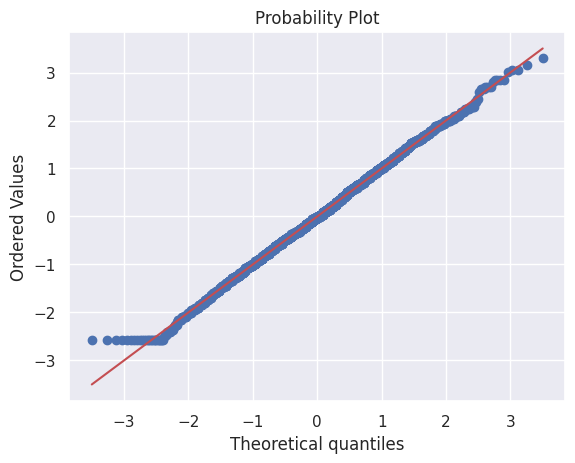

In [65]:
stats.probplot(col, dist="norm", plot=plt)
plt.show()

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

In [86]:
def check_if_norm(col: pd.Series):
    col = (col - col.mean()) / col.std(ddof=1)
    print(col.mean(), col.std())
    
    observed, bins = np.histogram(col, bins=7)
    expected = np.repeat(len(col)/len(observed), len(observed))
    chi2_stat = ((observed - expected)**2 / expected).sum()
    df_chi = len(observed) - 1 - 2  # поправка на оценку mean/var
    p_value = 1 - stats.chi2.cdf(chi2_stat, df=df_chi)
    print(f"χ²: {chi2_stat:.3f}, p-value: {p_value:.3f}")

    print("skew: ", col.skew())
    print("kurt: ", col.kurtosis())

    stats.probplot(col, dist="norm", plot=plt)
    plt.show()

7.105427357601002e-18 1.0
χ²: 1830.649, p-value: 0.000
skew:  0.016205396823207416
kurt:  -0.12081610863833214


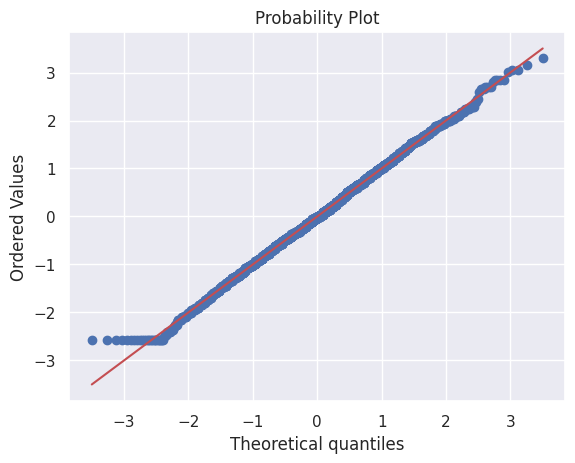

In [87]:
check_if_norm(col=col)

-9.654113257610057e-18 0.9999999999999999
χ²: 1018.399, p-value: 0.000
skew:  -0.003277267091805772
kurt:  -0.45260648321943764


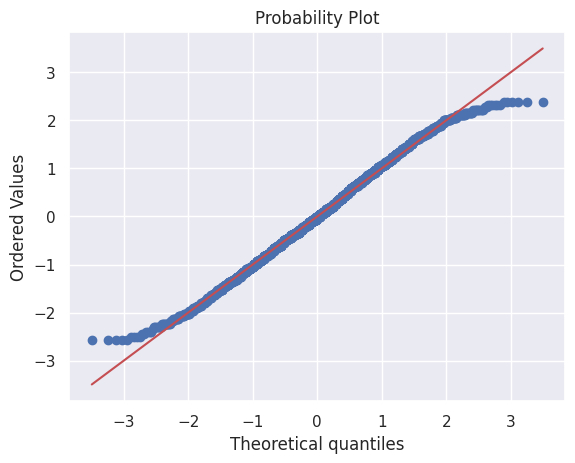

None


In [89]:
# Убираем крайние 1% выбросов
q_low, q_high = col.quantile([0.01, 0.99])
col_clean = col[(col >= q_low) & (col <= q_high)]

col_norm = (col_clean - col_clean.mean()) / col_clean.std(ddof=0)

results = check_if_norm(col_norm)
print(results)

Хи квадрат уменьшился с 1.8к до 1к. Данные стали симметричнее, хвосты площе

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы


In [91]:
grouped = df.groupby('School_Grade')[col_name]

In [92]:
stats_by_grade = grouped.agg(['mean', 'var'])
print(stats_by_grade)

                  mean       var
School_Grade                    
10th          4.977618  3.812605
11th          5.061795  3.635211
12th          4.936862  3.735589
7th           5.077062  3.883344
8th           5.066390  4.009513
9th           5.012167  3.912652


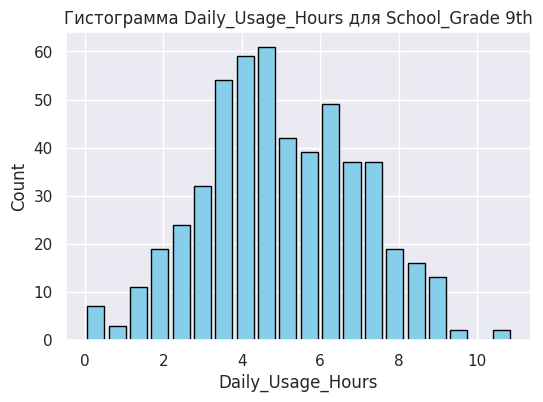

Grade 9th — среднее: 5.012, дисперсия: 3.913


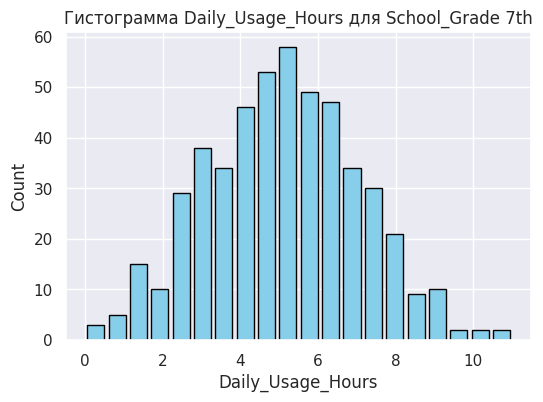

Grade 7th — среднее: 5.077, дисперсия: 3.883


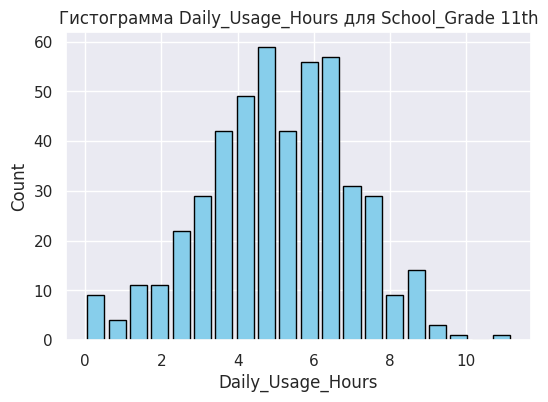

Grade 11th — среднее: 5.062, дисперсия: 3.635


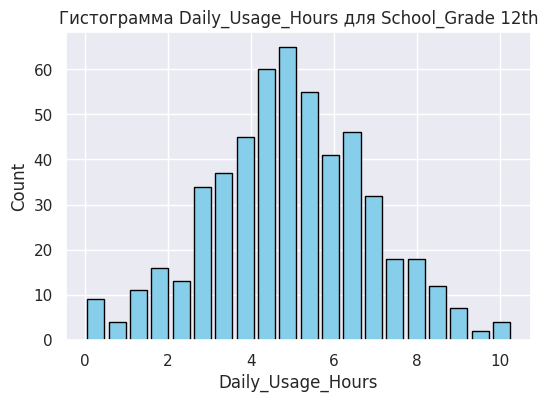

Grade 12th — среднее: 4.937, дисперсия: 3.736


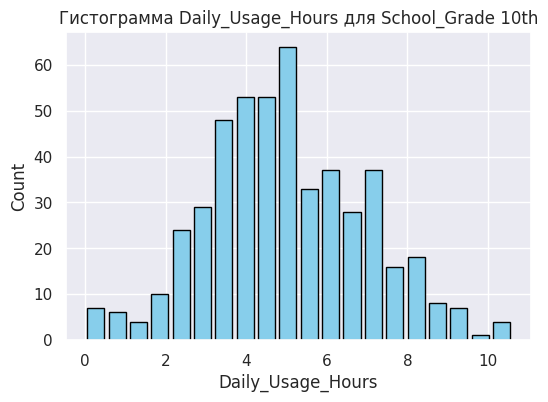

Grade 10th — среднее: 4.978, дисперсия: 3.813


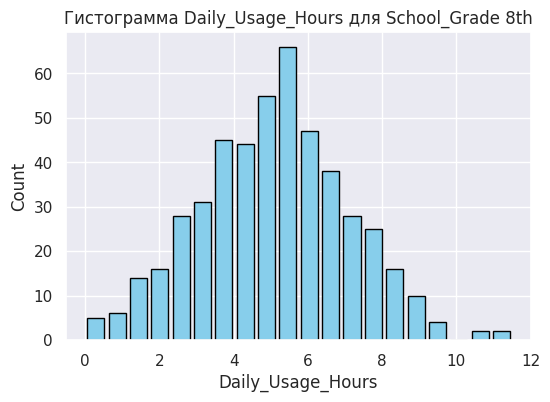

Grade 8th — среднее: 5.066, дисперсия: 4.010


In [97]:
grades = df['School_Grade'].unique()

for grade in grades:
    data = df[df['School_Grade'] == grade][col_name]
    
    plt.figure(figsize=(6,4))
    plt.hist(data, bins=20, rwidth=0.8, color='skyblue', edgecolor='black')
    plt.title(f"Гистограмма {col_name} для School_Grade {grade}")
    plt.xlabel(col_name)
    plt.ylabel("Count")
    plt.show()
    
    mean_val = data.mean()
    var_val = data.var(ddof=1)
    print(f"Grade {grade} — среднее: {mean_val:.3f}, дисперсия: {var_val:.3f}")


Распределения похожи, два почти симметричны, у остальных небольшой положительный skew (скос вправо)

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'
